In [1]:
# To install necessary uncommon packages enable these:
# !pip install nibabel
# !pip install SimpleITK

In [30]:
# Imports
# Project specific
import nibabel as nib
import SimpleITK

# General
import numpy as np
import os
import re

# Plotting
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [3]:
# Set working directory
working_dir = '/home/ad.adasworks.com/adrian.bodai/Downloads/'

# Human Heart Project - ACDC Dataset

## Data Visualization

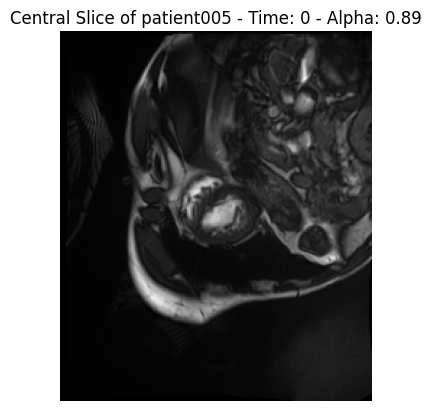

In [34]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import re
import os
from matplotlib.animation import FuncAnimation


def load_patient_data(patient_path):
    img = nib.load(patient_path)
    data = img.get_fdata()
    
    match = re.search(r'patient\d+', patient_path)
    if match:
        patient_name = match.group(0)
    else:
        patient_name = 'patient000_unknown'

    return data, patient_name

def update_frame(alpha, data, patient_name, time, ax):
    slice_0 = data[:, :, :, time]  # (3D image) - specific time slice
    z_index = int(slice_0.shape[2] * alpha)  # Calculate the z-slice index
    ax.clear()  # Clear the previous image

    ax.imshow(slice_0[:, :, z_index], cmap='gray')
    ax.set_title(f'Central Slice of {patient_name} - Time: {time} - Alpha: {alpha:.2f}')
    ax.axis('off')

def create_mini_movie(patient_path, time=0, num_frames=10, interval=200):
    data, patient_name = load_patient_data(patient_path)
    fig, ax = plt.subplots()
    alpha_values = np.linspace(0, 1, num_frames)[:-1]

    anim = FuncAnimation(fig, update_frame, frames=alpha_values, fargs=(data, patient_name, time, ax),
                         interval=interval, repeat=False)
    anim.save(f'{patient_name}_mini_movie.gif', writer='imagemagick', fps=5)
    plt.show()

example_patient = 'patient005_4d.nii.gz'
time = 0  # Choose the time frame

# Create the mini movie
create_mini_movie(os.path.join(working_dir, example_patient), time=time)
